# Notebook Setup


## Connect to G-Drive

In [1]:
# Connecting Notebook with G-Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# Setting the file path that contains the dataset
import os
os.chdir('/content/drive/MyDrive/Digital Skola/Project/Final Project')

In [3]:
!ls

'DS Final Project - Multiclass Classification - Project Six.ipynb'   mulclass_preprocessed.csv
'Final Project.zip'						     Test.csv
 modelml							     Train.csv


## Import Libraries

In [4]:
# Analysis
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Preprocessing
from sklearn.preprocessing import (
    LabelEncoder, OneHotEncoder,
    RobustScaler
)

# Machine Learning Algorithm
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import (
    GradientBoostingClassifier,
    RandomForestClassifier
)

# Model Selection
from sklearn import model_selection
from sklearn.model_selection import (
    StratifiedKFold,
    train_test_split,
    cross_val_score,
    GridSearchCV
)

# Model Evaluation
from sklearn.metrics import (
    make_scorer,
    precision_score,
    accuracy_score,
    recall_score,
    f1_score
)

# Save Model
import pickle

# 1.&nbsp;Load Dataset

# 1.1. &nbsp;Context

An automobile company has plans to enter new markets with their existing products (P1, P2, P3, P4, and P5). After intensive market research, they’ve deduced that the behavior of the new market is similar to their existing market.

In their existing market, the sales team has classified all customers into 4 segments (A, B, C, D ). Then, they performed segmented outreach and communication for a different segment of customers.

You are required to help the manager to predict the right group of the new customers.

*   **ID** Unique ID
*   **Gender** Gender of the customer
*   **Ever_Married** Marital status of the customer
*   **Age** Age of the customer
*   **Graduated** Is the customer a graduate?
*   **Profession** Profession of the customer
*   **Work_Experience** Work Experience in years
*   **Spending_Score** Spending score of the customer
*   **Family_Size** Number of family members for the customer (including the customer)
*   **Var_1** Anonymised Category for the customer
*   **Segmentation** (target) Customer Segment of the customer

\
Acknowledgements
This dataset was acquired from the Analytics Vidhya hackathon. [here](https://www.kaggle.com/datasets/kaushiksuresh147/customer-segmentation?select=Train.csv)

In [5]:
# Creating dataframe from csv
df = pd.read_csv('Train.csv')

In [6]:
# Display the top 5 rows of the dataset
df.head()

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,462809,Male,No,22,No,Healthcare,1.0,Low,4.0,Cat_4,D
1,462643,Female,Yes,38,Yes,Engineer,NaN,Average,3.0,Cat_4,A
2,466315,Female,Yes,67,Yes,Engineer,1.0,Low,1.0,Cat_6,B
3,461735,Male,Yes,67,Yes,Lawyer,0.0,High,2.0,Cat_6,B
4,462669,Female,Yes,40,Yes,Entertainment,NaN,High,6.0,Cat_6,A


In [7]:
# Display the last 5 rows of the dataset
df.tail()

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
8063,464018,Male,No,22,No,NaN,0.0,Low,7.0,Cat_1,D
8064,464685,Male,No,35,No,Executive,3.0,Low,4.0,Cat_4,D
8065,465406,Female,No,33,Yes,Healthcare,1.0,Low,1.0,Cat_6,D
8066,467299,Female,No,27,Yes,Healthcare,1.0,Low,4.0,Cat_6,B
8067,461879,Male,Yes,37,Yes,Executive,0.0,Average,3.0,Cat_4,B


# 2.&nbsp;Exploratory Data Analysis

## 2.1. &nbsp;Data Understanding

In [8]:
# For easy coding
rename_mapper = {col: col.lower() for col in df.columns}
df.rename(
    columns = rename_mapper,
    inplace = True
)

In [9]:
# Display the columns in the dataset
df.columns

Index(['id', 'gender', 'ever_married', 'age', 'graduated', 'profession',
       'work_experience', 'spending_score', 'family_size', 'var_1',
       'segmentation'],
      dtype='object')

In [10]:
# View the number of rows and columns
df.shape

(8068, 11)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8068 entries, 0 to 8067
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               8068 non-null   int64  
 1   gender           8068 non-null   object 
 2   ever_married     7928 non-null   object 
 3   age              8068 non-null   int64  
 4   graduated        7990 non-null   object 
 5   profession       7944 non-null   object 
 6   work_experience  7239 non-null   float64
 7   spending_score   8068 non-null   object 
 8   family_size      7733 non-null   float64
 9   var_1            7992 non-null   object 
 10  segmentation     8068 non-null   object 
dtypes: float64(2), int64(2), object(7)
memory usage: 693.5+ KB


In [12]:
# Checking unique value
for col in df.columns:
  val_dist = df[col].unique()
  num_dist = df[col].nunique()

  print(f"{col}: {num_dist} --->> {val_dist}\n")

id: 8068 --->> [462809 462643 466315 ... 465406 467299 461879]

gender: 2 --->> ['Male' 'Female']

ever_married: 2 --->> ['No' 'Yes' nan]

age: 67 --->> [22 38 67 40 56 32 33 61 55 26 19 70 58 41 31 79 49 18 36 35 45 42 83 27
 28 47 29 57 76 25 72 48 74 59 39 51 30 63 52 60 68 86 50 43 80 37 46 69
 78 71 82 23 20 85 21 53 62 75 65 89 66 73 77 87 84 81 88]

graduated: 2 --->> ['No' 'Yes' nan]

profession: 9 --->> ['Healthcare' 'Engineer' 'Lawyer' 'Entertainment' 'Artist' 'Executive'
 'Doctor' 'Homemaker' 'Marketing' nan]

work_experience: 15 --->> [ 1. nan  0.  4.  9. 12.  3. 13.  5.  8. 14.  7.  2.  6. 10. 11.]

spending_score: 3 --->> ['Low' 'Average' 'High']

family_size: 9 --->> [ 4.  3.  1.  2.  6. nan  5.  8.  7.  9.]

var_1: 7 --->> ['Cat_4' 'Cat_6' 'Cat_7' 'Cat_3' 'Cat_1' 'Cat_2' nan 'Cat_5']

segmentation: 4 --->> ['D' 'A' 'B' 'C']



In [13]:
# Display Class
print("Total:")
print(df["segmentation"].value_counts(), "\n")
print("Percentage:")
print(df["segmentation"].value_counts(normalize=True))

Total:
segmentation
D    2268
A    1972
C    1970
B    1858
Name: count, dtype: int64 

Percentage:
segmentation
D    0.281111
A    0.244422
C    0.244175
B    0.230293
Name: proportion, dtype: float64


In [14]:
df.describe(
    percentiles = [0.1, 0.25, 0.4, 0.5, 0.6, 0.75, 0.9]
).T

,count,mean,std,min,10%,25%,40%,50%,60%,75%,90%,max
id,8068.0,463479.214551,2595.381232,458982.0,459880.7,461240.75,462572.8,463472.5,464358.2,465744.25,467075.3,467974.0
age,8068.0,43.466906,16.711696,18.0,25.0,30.00,37.0,40.0,45.0,53.00,69.0,89.0
work_experience,7239.0,2.641663,3.406763,0.0,0.0,0.00,1.0,1.0,1.0,4.00,8.0,14.0
family_size,7733.0,2.850123,1.531413,1.0,1.0,2.00,2.0,3.0,3.0,4.00,5.0,9.0


In [15]:
# Checking duplicated value
df[df.duplicated]

,id,gender,ever_married,age,graduated,profession,work_experience,spending_score,family_size,var_1,segmentation


In [16]:
df = df.drop("id", axis = 1)

## 2.2. &nbsp;Identifying Missing Value

In [17]:
# Display the basic information of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8068 entries, 0 to 8067
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   gender           8068 non-null   object 
 1   ever_married     7928 non-null   object 
 2   age              8068 non-null   int64  
 3   graduated        7990 non-null   object 
 4   profession       7944 non-null   object 
 5   work_experience  7239 non-null   float64
 6   spending_score   8068 non-null   object 
 7   family_size      7733 non-null   float64
 8   var_1            7992 non-null   object 
 9   segmentation     8068 non-null   object 
dtypes: float64(2), int64(1), object(7)
memory usage: 630.4+ KB


In [18]:
# Showing columns have null values and their counts
df.isna().sum()

,0
gender,0
ever_married,140
age,0
graduated,78
profession,124
work_experience,829
spending_score,0
family_size,335
var_1,76
segmentation,0


In [19]:
# Display only columns that have NULL values
df.isna().sum().loc[lambda x: x > 0]

,0
ever_married,140
graduated,78
profession,124
work_experience,829
family_size,335
var_1,76


In [20]:
cols_null = list(df.isna().sum().loc[lambda x: x > 0].index)
cols_null

['ever_married',
 'graduated',
 'profession',
 'work_experience',
 'family_size',
 'var_1']

## 2.3.&nbsp;Identifying Outliers

In [23]:
# Categorize the columns into numerical and categorical columns
num_cols = []
cat_cols = []
for col in df.columns:
  if col == 'segmentation':
    continue
  elif df[col].dtypes == object:
    cat_cols.append(col)
  else:
    num_cols.append(col)

In [26]:
print("Numerical columns:", num_cols)
print("Categorical columns:", cat_cols)

Numerical columns: ['age', 'work_experience', 'family_size']
Categorical columns: ['gender', 'ever_married', 'graduated', 'profession', 'spending_score', 'var_1']


In [24]:
# Checking outliers
def outlier_thresholds(
    df, feature,
    quantile_lower= 0.25,
    quantile_upper= 0.75):

  Q1 = df[feature].quantile(quantile_lower)
  Q3 = df[feature].quantile(quantile_upper)
  IQR = Q3 - Q1

  lower_limit = Q1 - 1.5 * IQR
  upper_limit = Q3 + 1.5 * IQR

  return lower_limit, upper_limit

def has_outliers(
    df, feature,
    quantile_lower= 0.25,
    quantile_upper= 0.75):

  low_lim, up_lim = outlier_thresholds(df, feature, quantile_lower, quantile_upper)

  exist_lower_outliers = (df[feature] < low_lim).any(axis=None)
  exist_upper_outliers = (df[feature] > up_lim).any(axis=None)

  return (exist_lower_outliers or exist_upper_outliers)

In [27]:
feats_with_outliers = []

for feat in num_cols:
    exist_outliers = has_outliers(df, feat)
    if exist_outliers:
        print(f"Outliers exist in {feat}!")
        feats_with_outliers.append(feat)
    else:
      print(f"there are no outliers in {feat}")

Outliers exist in age!
Outliers exist in work_experience!
Outliers exist in family_size!


## 2.4.&nbsp;Data Visualization (Before Preprocessing)

### Data Distribution

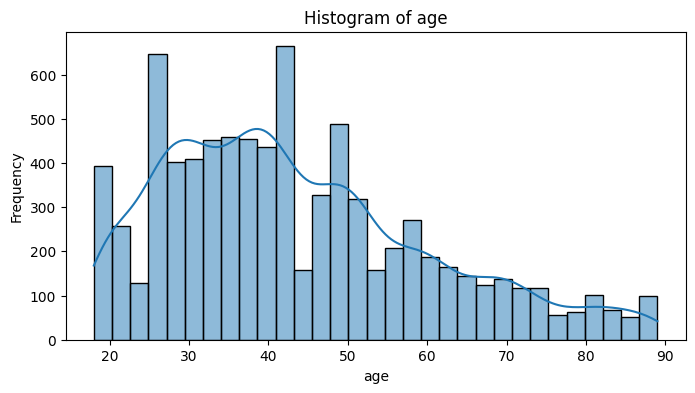

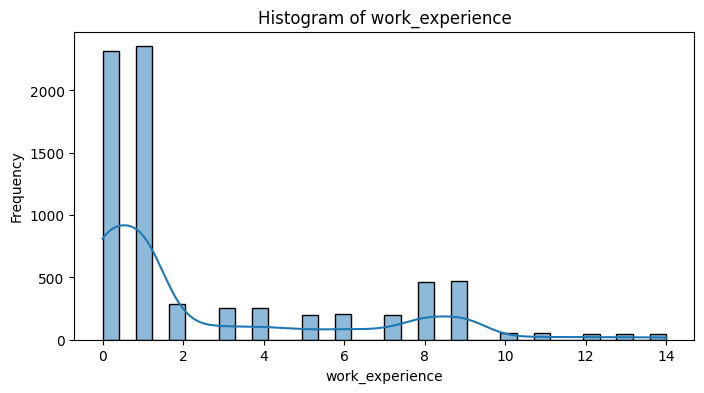

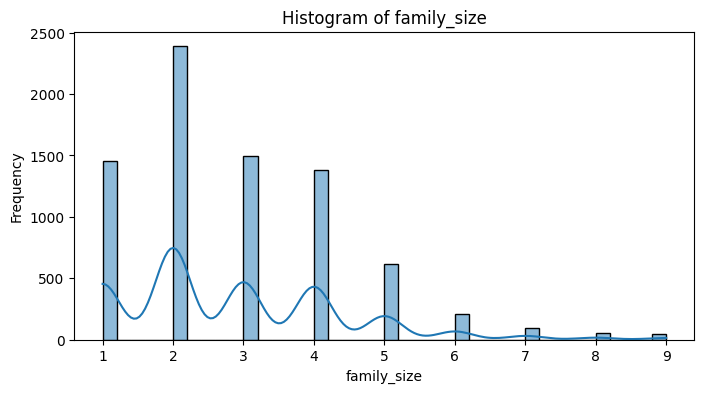

In [28]:
# Create a histogram for the numerical data
for col in num_cols:
    plt.figure(figsize=(8, 4))
    sns.histplot(df[col], kde=True)
    plt.title(f'Histogram of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

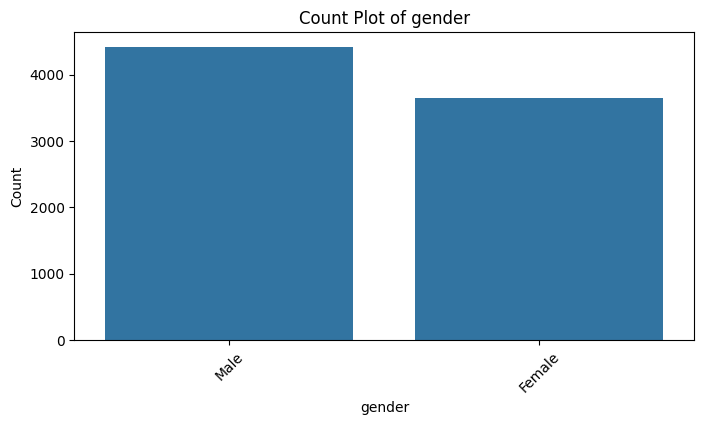

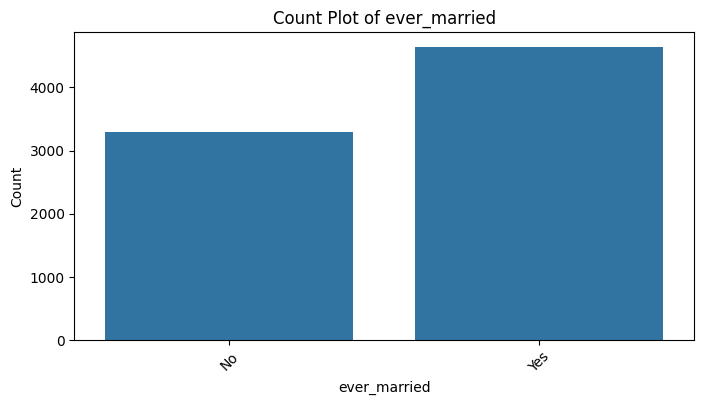

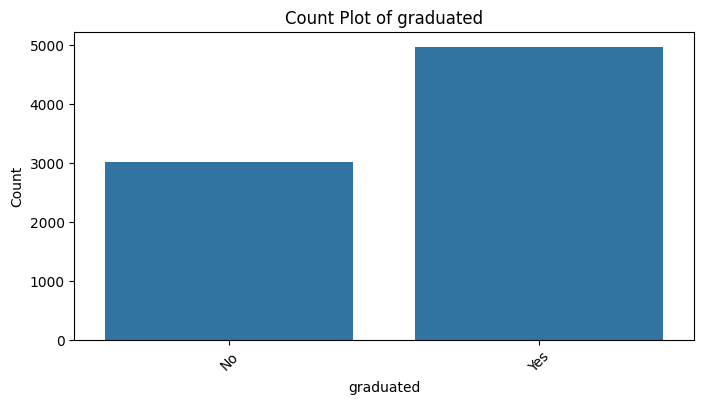

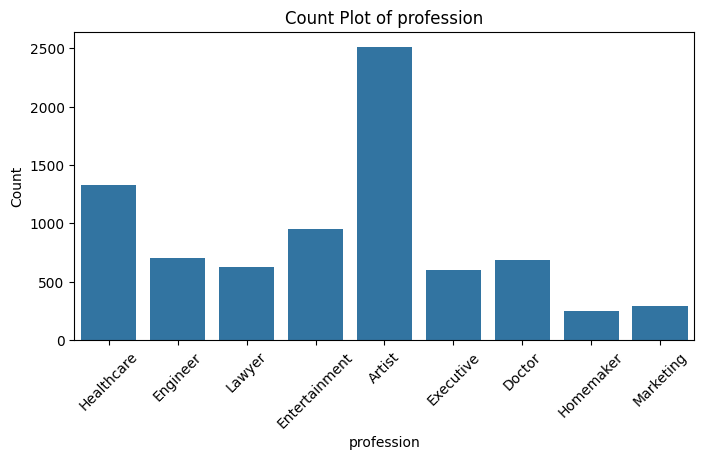

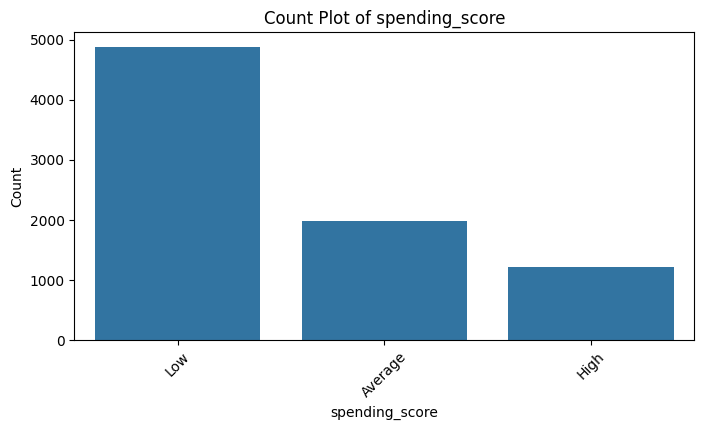

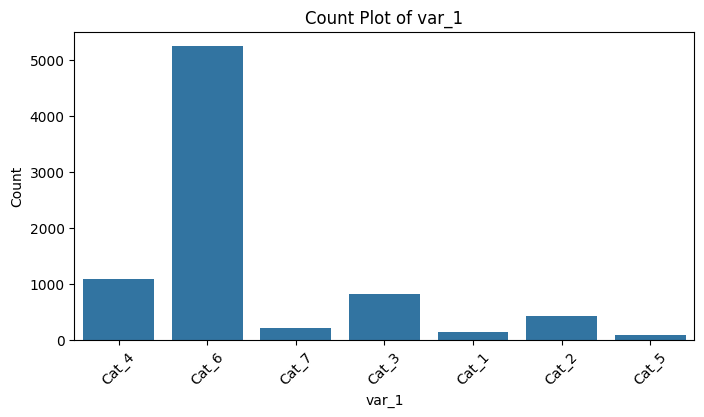

In [29]:
# Create a count plot for the categorical data
for col in cat_cols:
    plt.figure(figsize=(8, 4))
    sns.countplot(x=col, data=df)
    plt.title(f'Count Plot of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.show()

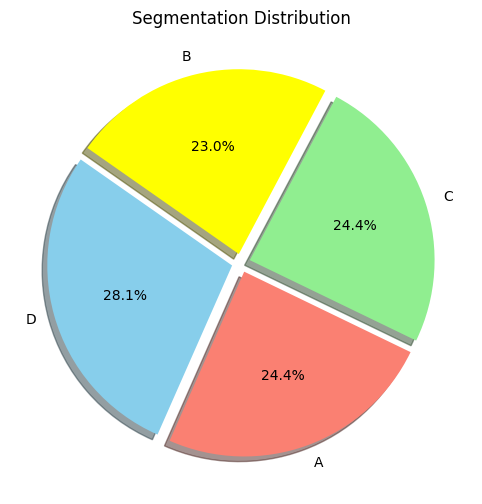

In [30]:
# Create pie chart for segmentation distribution
segment_summary = df['segmentation'].value_counts().reset_index()
segment_counts = df['segmentation'].value_counts()
segment_summary.columns = ['segmentation', 'count']
counts = segment_summary['count'].values
labels = segment_summary['segmentation'].values
colors = ['skyblue', 'salmon', 'lightgreen', 'yellow']
explode = [0.05] * len(counts)

plt.figure(figsize=(8, 6))
plt.pie(
    counts,
    labels=labels,
    colors = colors,
    autopct='%1.1f%%',
    explode=explode,
    shadow=True,
    startangle=145
)
plt.title('Segmentation Distribution')
plt.show()

### Customer Behavior Analysis

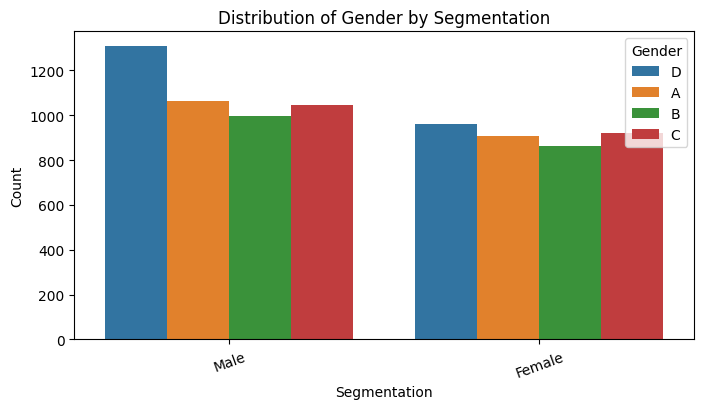

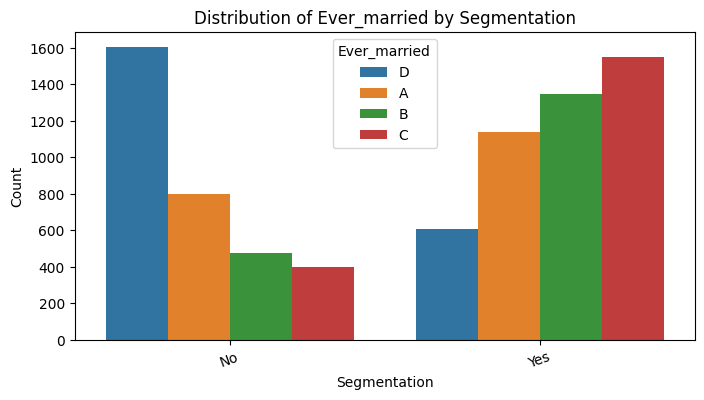

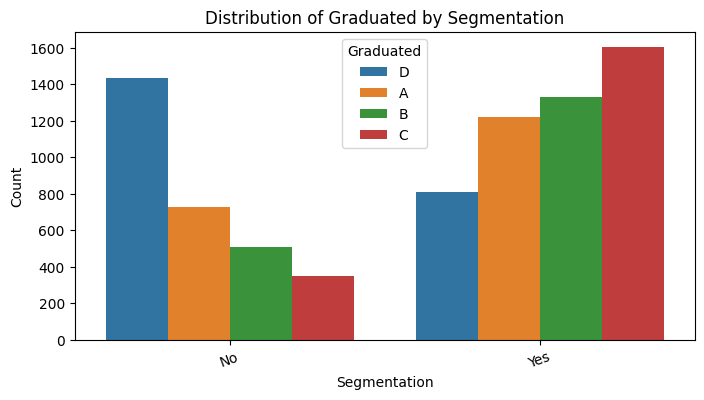

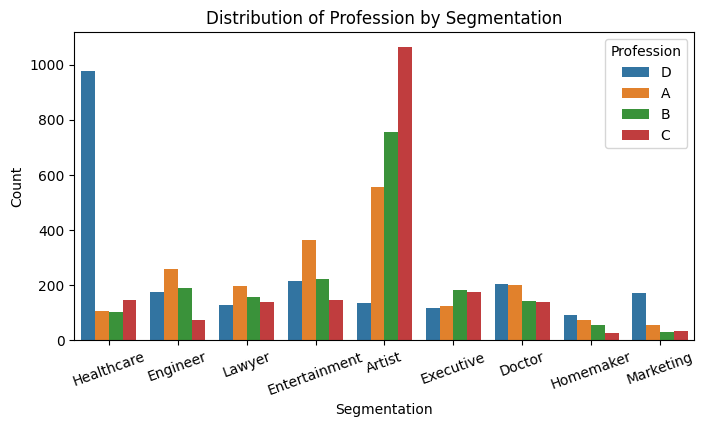

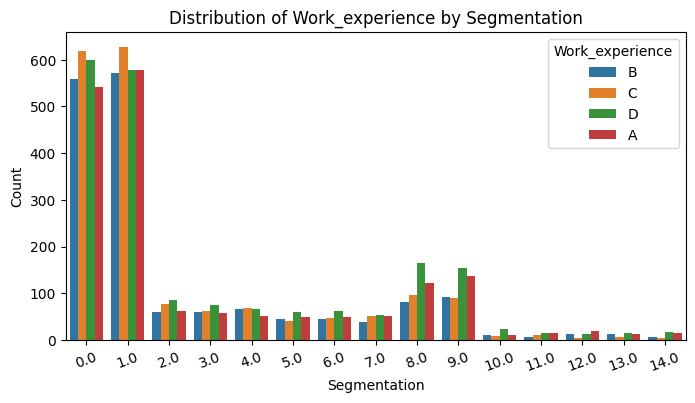

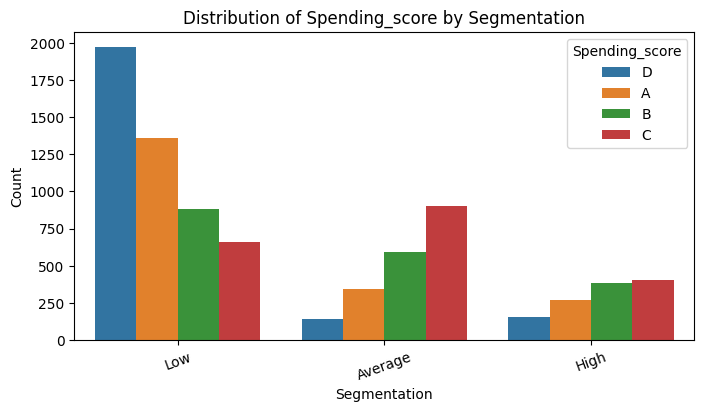

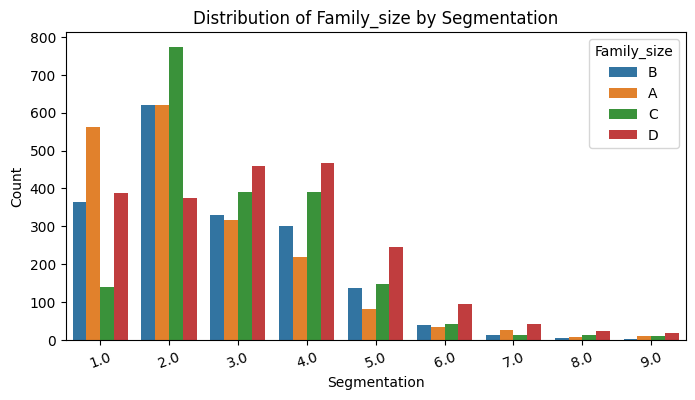

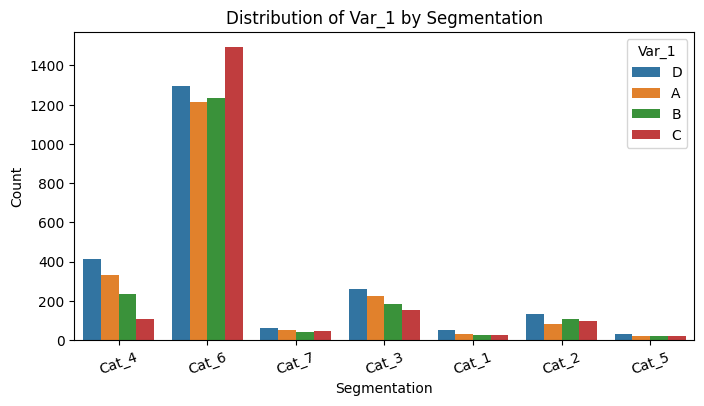

In [31]:
# Customer Behavior

for col in df.columns:
    if col == 'segmentation':
      continue
    elif col == 'age':
      continue
    else:
      plt.figure(figsize=(8, 4))
      sns.countplot(x=col, hue='segmentation', data=df)
      plt.title(f'Distribution of {col.capitalize()} by Segmentation')
      plt.xlabel('Segmentation')
      plt.ylabel('Count')
      plt.legend(title=col.capitalize())
      plt.xticks(rotation=20)
      plt.show()

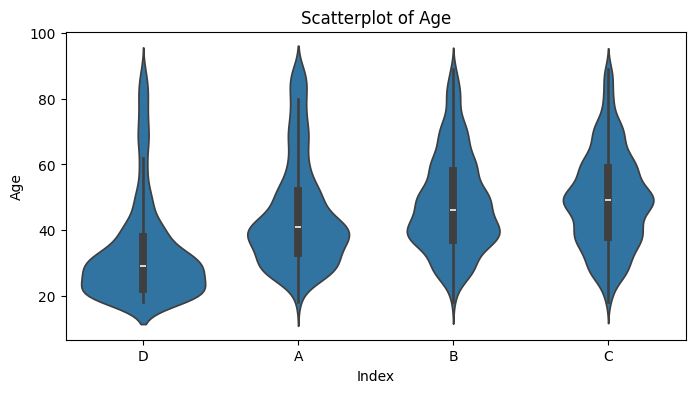

In [32]:
#Age by segmentation
plt.figure(figsize=(8, 4))
sns.violinplot(data=df, x='segmentation', y='age')

plt.title('Scatterplot of Age')
plt.xlabel('Index')
plt.ylabel('Age')

plt.show()

### Outliers Analysis

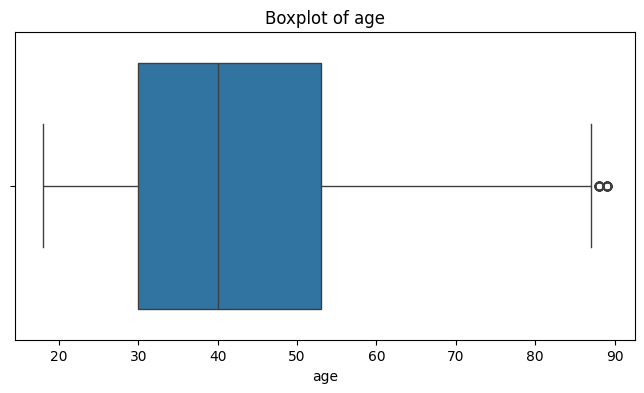

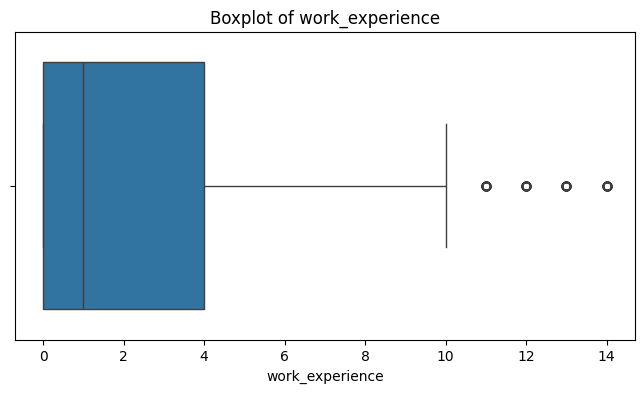

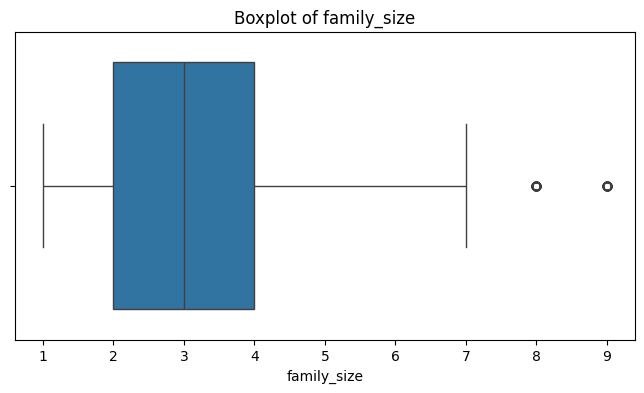

In [33]:
#Using boxplot to see outliers
for col in num_cols:
  plt.figure(figsize=(8, 4))
  sns.boxplot(x=df[col])
  plt.title(f'Boxplot of {col}')
  plt.show()

# 3.&nbsp;Data Preprocessing

## 3.1&nbsp;Handling Missing Value

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8068 entries, 0 to 8067
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   gender           8068 non-null   object 
 1   ever_married     7928 non-null   object 
 2   age              8068 non-null   int64  
 3   graduated        7990 non-null   object 
 4   profession       7944 non-null   object 
 5   work_experience  7239 non-null   float64
 6   spending_score   8068 non-null   object 
 7   family_size      7733 non-null   float64
 8   var_1            7992 non-null   object 
 9   segmentation     8068 non-null   object 
dtypes: float64(2), int64(1), object(7)
memory usage: 630.4+ KB


In [35]:
df.isna().sum().loc[lambda x: x > 0]

,0
ever_married,140
graduated,78
profession,124
work_experience,829
family_size,335
var_1,76


In [36]:
# Count the number of NULL values and calculate the percentage
for col in df.columns:
  zero = df[col].isna().sum()
  perc = zero/len(df) * 100
  if zero == 0:
      continue
  else:
    print("There are", str(zero), f"rows of data with item {col} equals NULL.")
    print("About {:.2f}% of total data.".format(perc),"\n")

There are 140 rows of data with item ever_married equals NULL.
About 1.74% of total data. 

There are 78 rows of data with item graduated equals NULL.
About 0.97% of total data. 

There are 124 rows of data with item profession equals NULL.
About 1.54% of total data. 

There are 829 rows of data with item work_experience equals NULL.
About 10.28% of total data. 

There are 335 rows of data with item family_size equals NULL.
About 4.15% of total data. 

There are 76 rows of data with item var_1 equals NULL.
About 0.94% of total data. 



In [37]:
# Drop NULL value
perc = df.isna().mean() * 100
drop_columns = perc[perc < 4].index
df = df.dropna(subset= drop_columns)

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7669 entries, 0 to 8067
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   gender           7669 non-null   object 
 1   ever_married     7669 non-null   object 
 2   age              7669 non-null   int64  
 3   graduated        7669 non-null   object 
 4   profession       7669 non-null   object 
 5   work_experience  6905 non-null   float64
 6   spending_score   7669 non-null   object 
 7   family_size      7376 non-null   float64
 8   var_1            7669 non-null   object 
 9   segmentation     7669 non-null   object 
dtypes: float64(2), int64(1), object(7)
memory usage: 659.1+ KB


In [39]:
df.isna().sum().loc[lambda x: x > 0]

,0
work_experience,764
family_size,293


In [40]:
# Imputation
null_col = df.isna().sum().loc[lambda x: x > 0].index

for col in null_col:
  for segment in df['segmentation'].unique():
    median_segment = df[df['segmentation'] == segment][col].median()
    df.loc[(df['segmentation'] == segment) & (df[col].isna()), col] = median_segment

In [41]:
# Re-Check missing value
df.isna().sum()

,0
gender,0
ever_married,0
age,0
graduated,0
profession,0
work_experience,0
spending_score,0
family_size,0
var_1,0
segmentation,0


## 3.2&nbsp;Handling Outliers

In [42]:
# Checking outliers
def outlier_thresholds(
    df, feature,
    quantile_lower= 0.25,
    quantile_upper= 0.75):

  Q1 = df[feature].quantile(quantile_lower)
  Q3 = df[feature].quantile(quantile_upper)
  IQR = Q3 - Q1

  lower_limit = Q1 - 1.5 * IQR
  upper_limit = Q3 + 1.5 * IQR

  return lower_limit, upper_limit

def has_outliers(
    df, feature,
    quantile_lower= 0.25,
    quantile_upper= 0.75):

  low_lim, up_lim = outlier_thresholds(df, feature, quantile_lower, quantile_upper)

  exist_lower_outliers = (df[feature] < low_lim).any(axis=None)
  exist_upper_outliers = (df[feature] > up_lim).any(axis=None)

  return (exist_lower_outliers or exist_upper_outliers)

In [43]:
feats_with_outliers = []

for feat in num_cols:
    exist_outliers = has_outliers(df, feat)
    if exist_outliers:
        print(f"Outliers exist in {feat}!")
        feats_with_outliers.append(feat)
    else:
      print(f"there are no outliers in {feat}")

Outliers exist in age!
Outliers exist in work_experience!
Outliers exist in family_size!


In [44]:
def replace_with_thresholds(df, numerical_feats):
    for feat in numerical_feats:
        low_limit, up_limit = outlier_thresholds(df, feat)

        mask_lower = (df[feat] < low_limit)
        mask_upper = (df[feat] > up_limit)

        df.loc[mask_lower, feat] = low_limit
        df.loc[mask_upper, feat] = up_limit

In [45]:
replace_with_thresholds(df, feats_with_outliers)

In [46]:
df.describe(
    percentiles = [0.1, 0.25, 0.4, 0.5, 0.6, 0.75, 0.9]
).T

,count,mean,std,min,10%,25%,40%,50%,60%,75%,90%,max
age,7669.0,43.482983,16.622277,18.0,25.0,31.0,37.0,40.0,45.0,53.0,69.0,86.0
work_experience,7669.0,2.414396,3.104909,0.0,0.0,0.0,1.0,1.0,1.0,4.0,8.0,10.0
family_size,7669.0,2.820446,1.444584,1.0,1.0,2.0,2.0,3.0,3.0,4.0,5.0,7.0


## 3.3.&nbsp;Data Visualization (After Preprocessing)

### Data Distribution

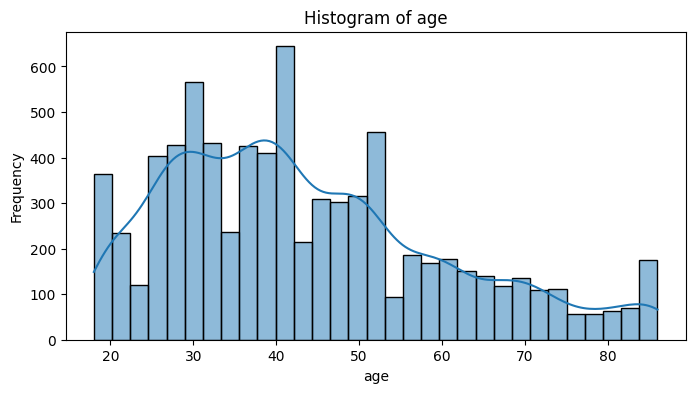

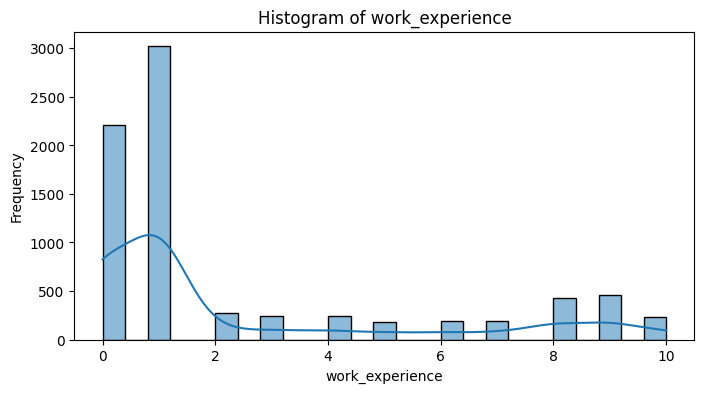

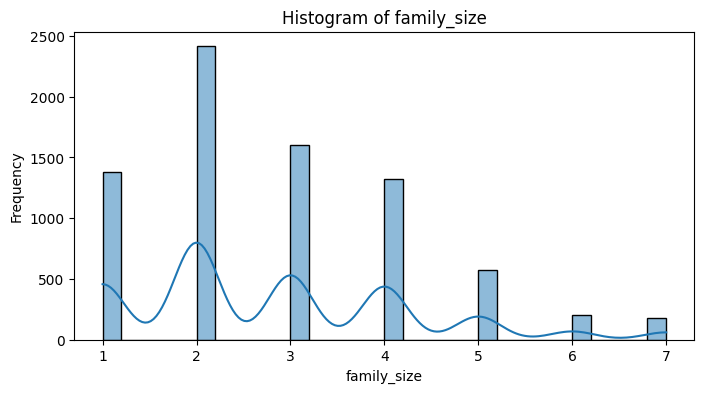

In [47]:
# Create a histogram for the numerical data
for col in num_cols:
    plt.figure(figsize=(8, 4))
    sns.histplot(df[col], kde=True)
    plt.title(f'Histogram of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

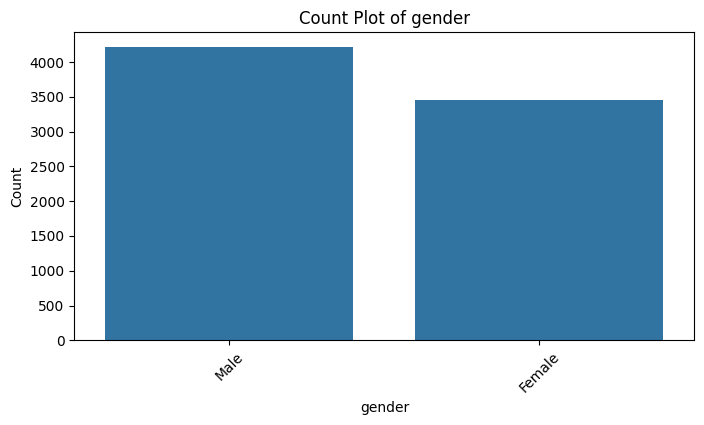

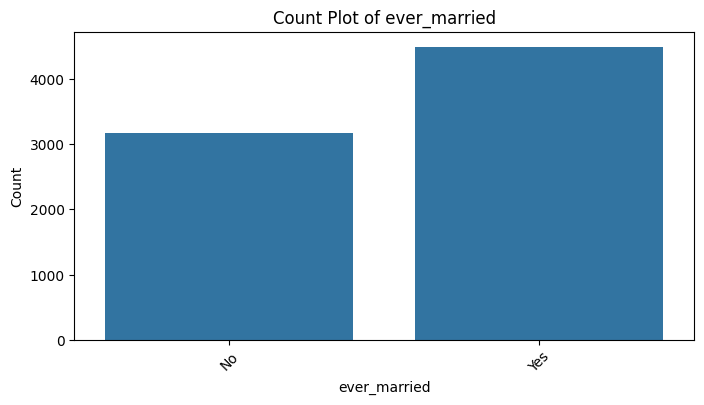

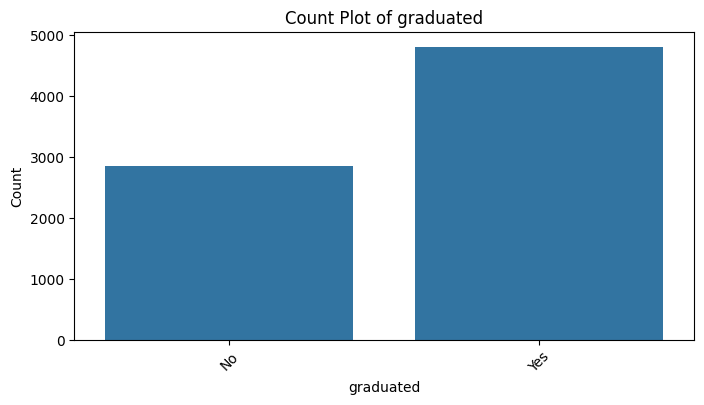

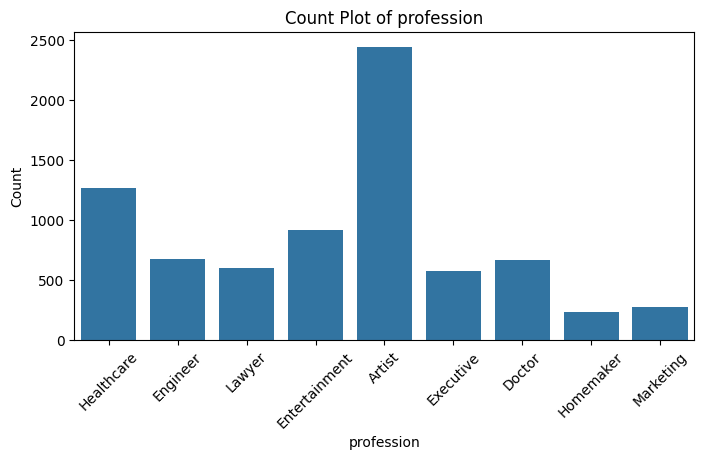

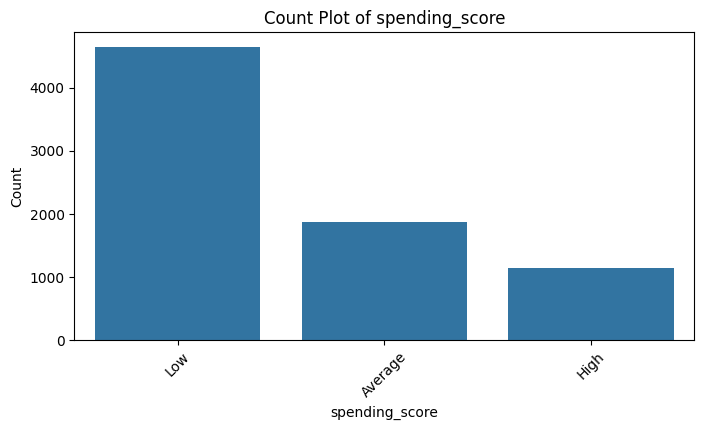

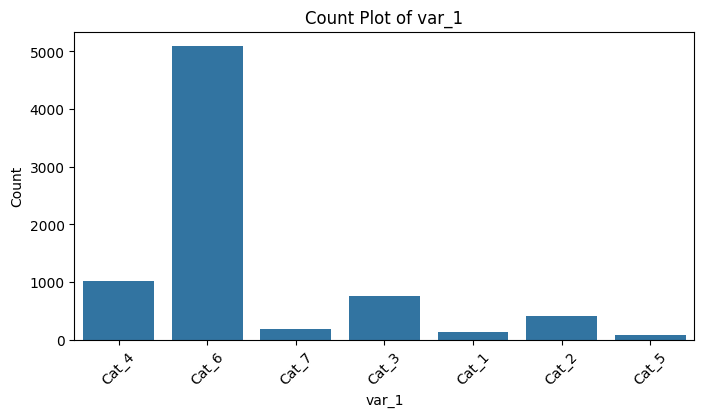

In [48]:
# Create a count plot for the categorical data
for col in cat_cols:
    plt.figure(figsize=(8, 4))
    sns.countplot(x=col, data=df)
    plt.title(f'Count Plot of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.show()

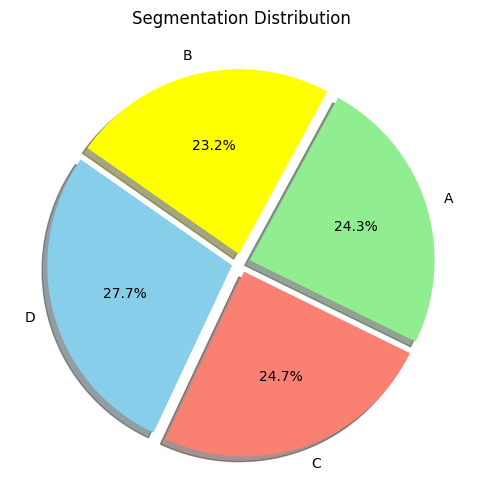

In [49]:
# Create pie chart for segmentation distribution
segment_summary = df['segmentation'].value_counts().reset_index()
segment_counts = df['segmentation'].value_counts()
segment_summary.columns = ['segmentation', 'count']
counts = segment_summary['count'].values
labels = segment_summary['segmentation'].values
colors = ['skyblue', 'salmon', 'lightgreen', 'yellow']
explode = [0.05] * len(counts)

plt.figure(figsize=(8, 6))
plt.pie(
    counts,
    labels=labels,
    colors = colors,
    autopct='%1.1f%%',
    explode=explode,
    shadow=True,
    startangle=145
)
plt.title('Segmentation Distribution')
plt.show()

### Customer Behavior Analysis

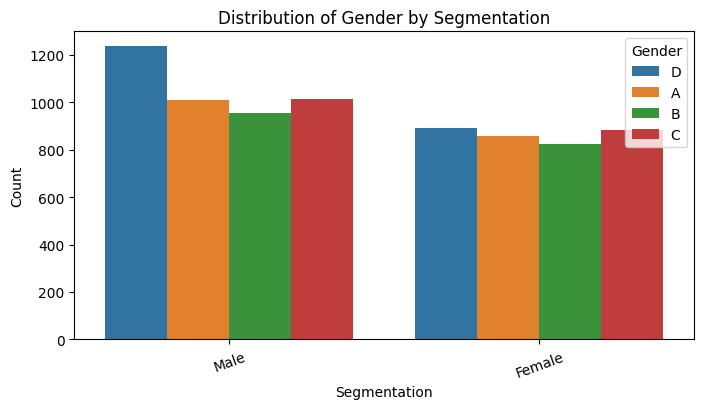

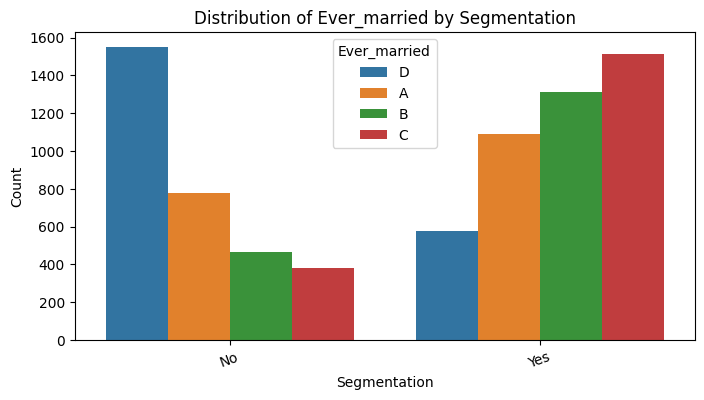

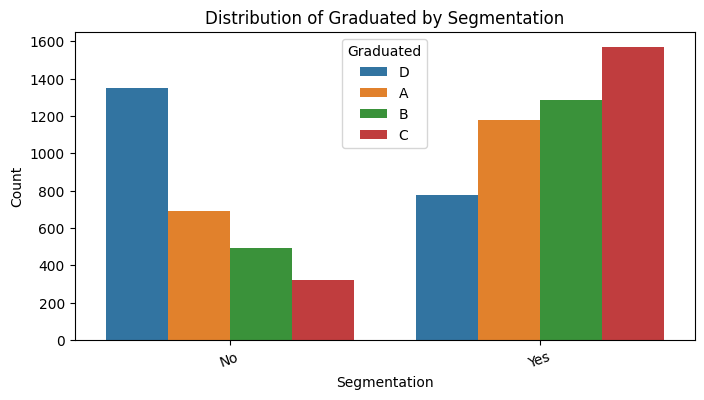

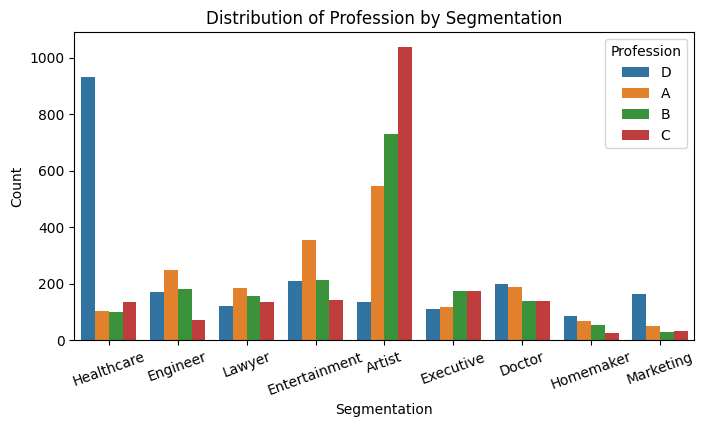

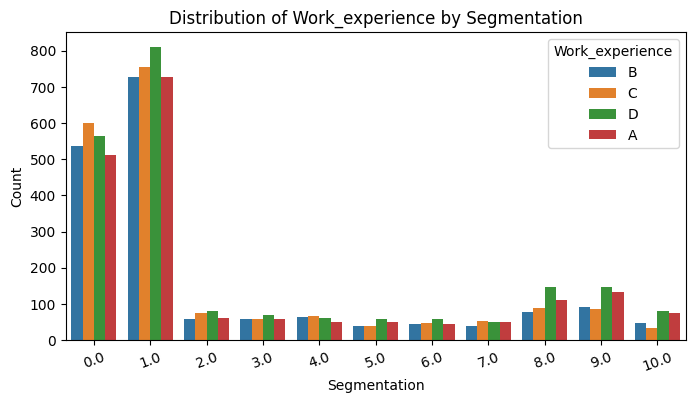

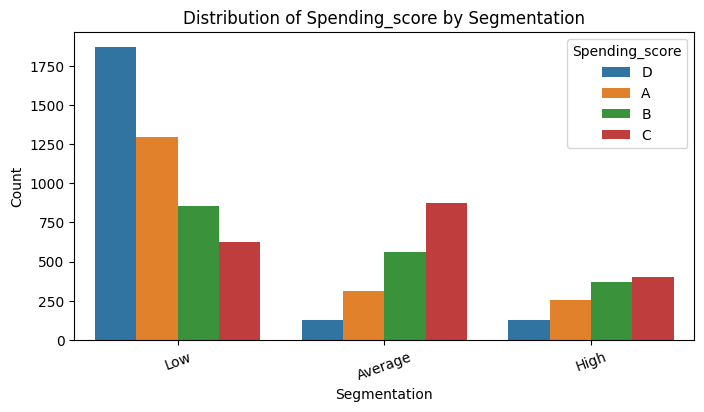

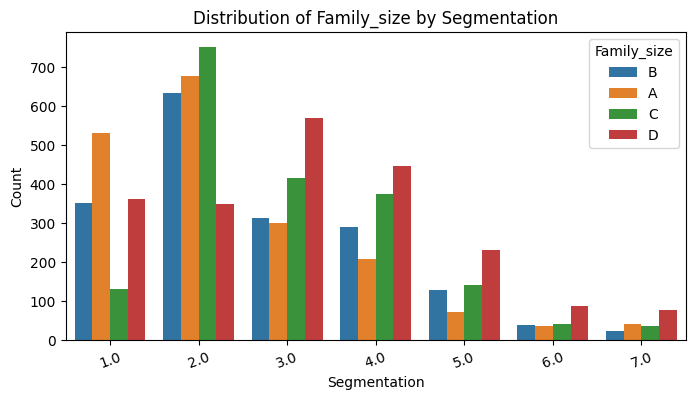

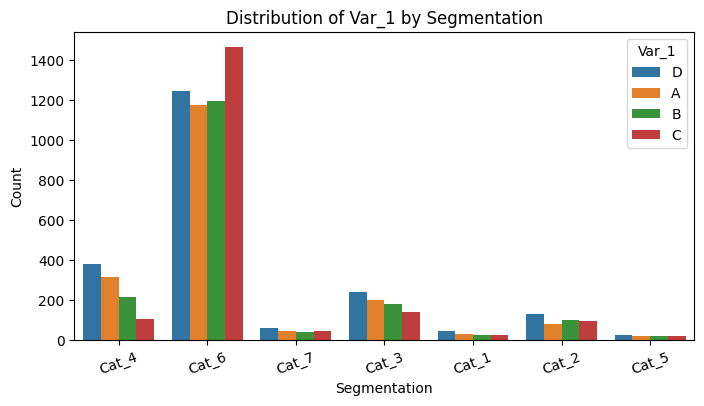

In [50]:
#

for col in df.columns:
    if col == 'segmentation':
      continue
    elif col == 'age':
      continue
    else:
      plt.figure(figsize=(8, 4))
      sns.countplot(x=col, hue='segmentation', data=df)
      plt.title(f'Distribution of {col.capitalize()} by Segmentation')
      plt.xlabel('Segmentation')
      plt.ylabel('Count')
      plt.legend(title=col.capitalize())
      plt.xticks(rotation=20)
      plt.show()

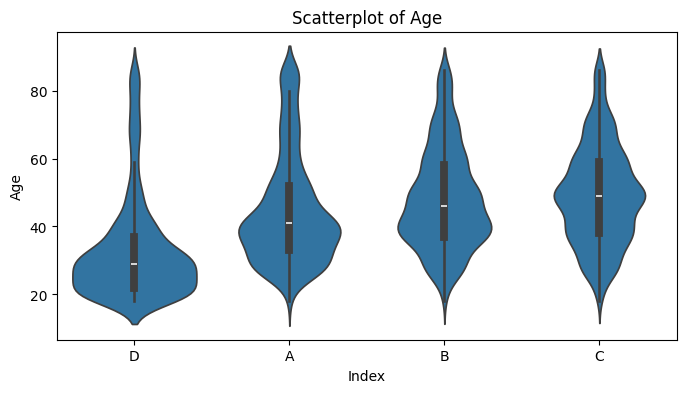

In [51]:
#Age by segmentation
plt.figure(figsize=(8, 4))
sns.violinplot(data=df, x='segmentation', y='age')

plt.title('Scatterplot of Age')
plt.xlabel('Index')
plt.ylabel('Age')

plt.show()

### Outliers Checking

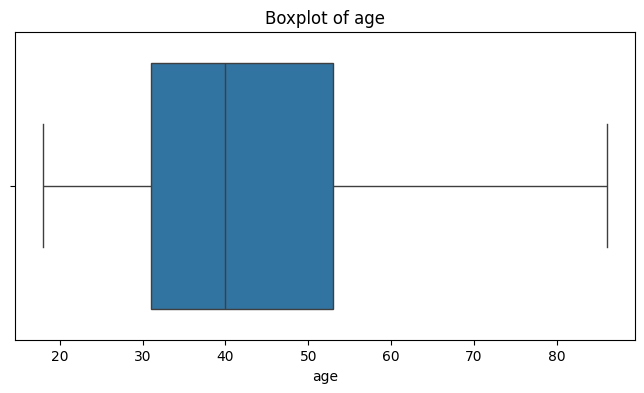

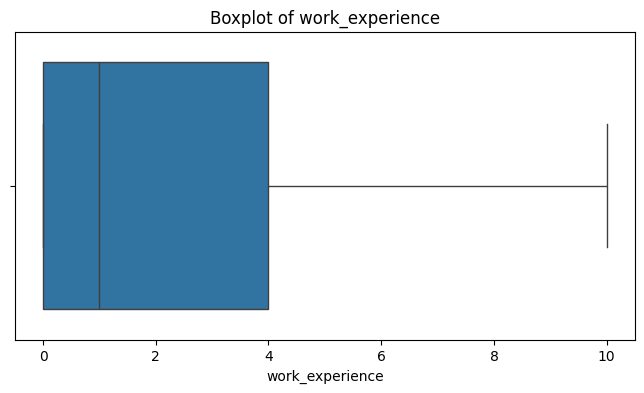

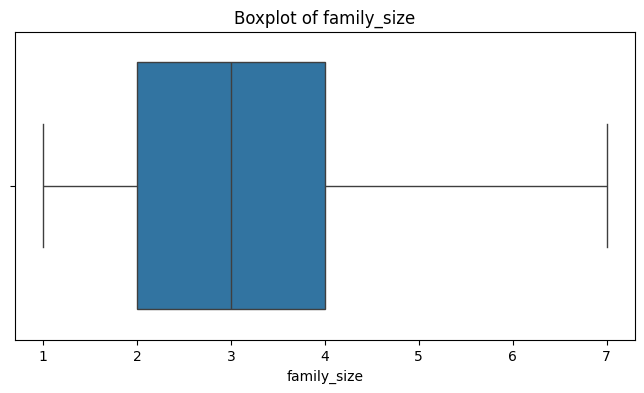

In [52]:
#Using boxplot to see outliers
for col in num_cols:
  plt.figure(figsize=(8, 4))
  sns.boxplot(x=df[col])
  plt.title(f'Boxplot of {col}')
  plt.show()

## 3.4.&nbsp;Feature Engineering

In [53]:
# Display the basic information of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7669 entries, 0 to 8067
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   gender           7669 non-null   object 
 1   ever_married     7669 non-null   object 
 2   age              7669 non-null   int64  
 3   graduated        7669 non-null   object 
 4   profession       7669 non-null   object 
 5   work_experience  7669 non-null   float64
 6   spending_score   7669 non-null   object 
 7   family_size      7669 non-null   float64
 8   var_1            7669 non-null   object 
 9   segmentation     7669 non-null   object 
dtypes: float64(2), int64(1), object(7)
memory usage: 659.1+ KB


In [54]:
# Checking unique value
for col in df.columns:
  val_dist = df[col].unique()
  num_dist = df[col].nunique()

  print(f"{col}: {num_dist} --->> {val_dist}\n")

gender: 2 --->> ['Male' 'Female']

ever_married: 2 --->> ['No' 'Yes']

age: 64 --->> [22 38 67 40 56 32 33 61 55 26 19 70 58 41 31 79 49 18 36 35 45 42 83 27
 28 47 29 57 76 25 72 48 74 59 39 51 30 63 52 60 68 86 50 43 80 37 46 69
 78 71 82 23 20 21 53 75 65 62 66 73 77 85 84 81]

graduated: 2 --->> ['No' 'Yes']

profession: 9 --->> ['Healthcare' 'Engineer' 'Lawyer' 'Entertainment' 'Artist' 'Executive'
 'Doctor' 'Homemaker' 'Marketing']

work_experience: 11 --->> [ 1.  0.  4.  9. 10.  3.  5.  8.  7.  2.  6.]

spending_score: 3 --->> ['Low' 'Average' 'High']

family_size: 7 --->> [4. 3. 1. 2. 6. 5. 7.]

var_1: 7 --->> ['Cat_4' 'Cat_6' 'Cat_7' 'Cat_3' 'Cat_1' 'Cat_2' 'Cat_5']

segmentation: 4 --->> ['D' 'A' 'B' 'C']



### Label Encoding

In [55]:
# Label Encoding

df['gender'] = np.where(df['gender'] == 'Male', 1, 0)
df['ever_married'] = np.where(df['ever_married'] == 'Yes', 1, 0)
df['graduated'] = np.where(df['graduated'] == 'Yes', 1, 0)
df['spending_score'] = np.where(df['spending_score'] == 'Low', 0,
                                np.where(df['spending_score'] == "Average", 1, 2))
df['segmentation'] = np.where(df['segmentation'] == 'A', 0,
                                np.where(df['segmentation'] == "B", 1,
                                         np.where(df['segmentation'] == "C", 2, 3)))


In [56]:
df.head()

,gender,ever_married,age,graduated,profession,work_experience,spending_score,family_size,var_1,segmentation
0,1,0,22,0,Healthcare,1.0,0,4.0,Cat_4,3
1,0,1,38,1,Engineer,1.0,1,3.0,Cat_4,0
2,0,1,67,1,Engineer,1.0,0,1.0,Cat_6,1
3,1,1,67,1,Lawyer,0.0,2,2.0,Cat_6,1
4,0,1,40,1,Entertainment,1.0,2,6.0,Cat_6,0


### One Hot Encoding

In [57]:
# One hot encoding

ohe = OneHotEncoder(sparse_output= False)

ohe_cols = ohe.fit_transform(df[['profession', 'var_1']])

ohe_cols_name = ohe.get_feature_names_out(['profession', 'var_1'])

df_ohe = pd.DataFrame(ohe_cols, columns=ohe_cols_name, index=df.index)

df = pd.concat([df.drop(columns=['profession', 'var_1']), df_ohe], axis=1)

In [58]:
df.head()

,gender,ever_married,age,graduated,work_experience,spending_score,family_size,segmentation,profession_Artist,profession_Doctor,profession_Engineer,profession_Entertainment,profession_Executive,profession_Healthcare,profession_Homemaker,profession_Lawyer,profession_Marketing,var_1_Cat_1,var_1_Cat_2,var_1_Cat_3,var_1_Cat_4,var_1_Cat_5,var_1_Cat_6,var_1_Cat_7
0,1,0,22,0,1.0,0,4.0,3,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,0,1,38,1,1.0,1,3.0,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,0,1,67,1,1.0,0,1.0,1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,1,1,67,1,0.0,2,2.0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0,1,40,1,1.0,2,6.0,0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


## 3.5. &nbsp;Correlation Analysis

<Axes: >

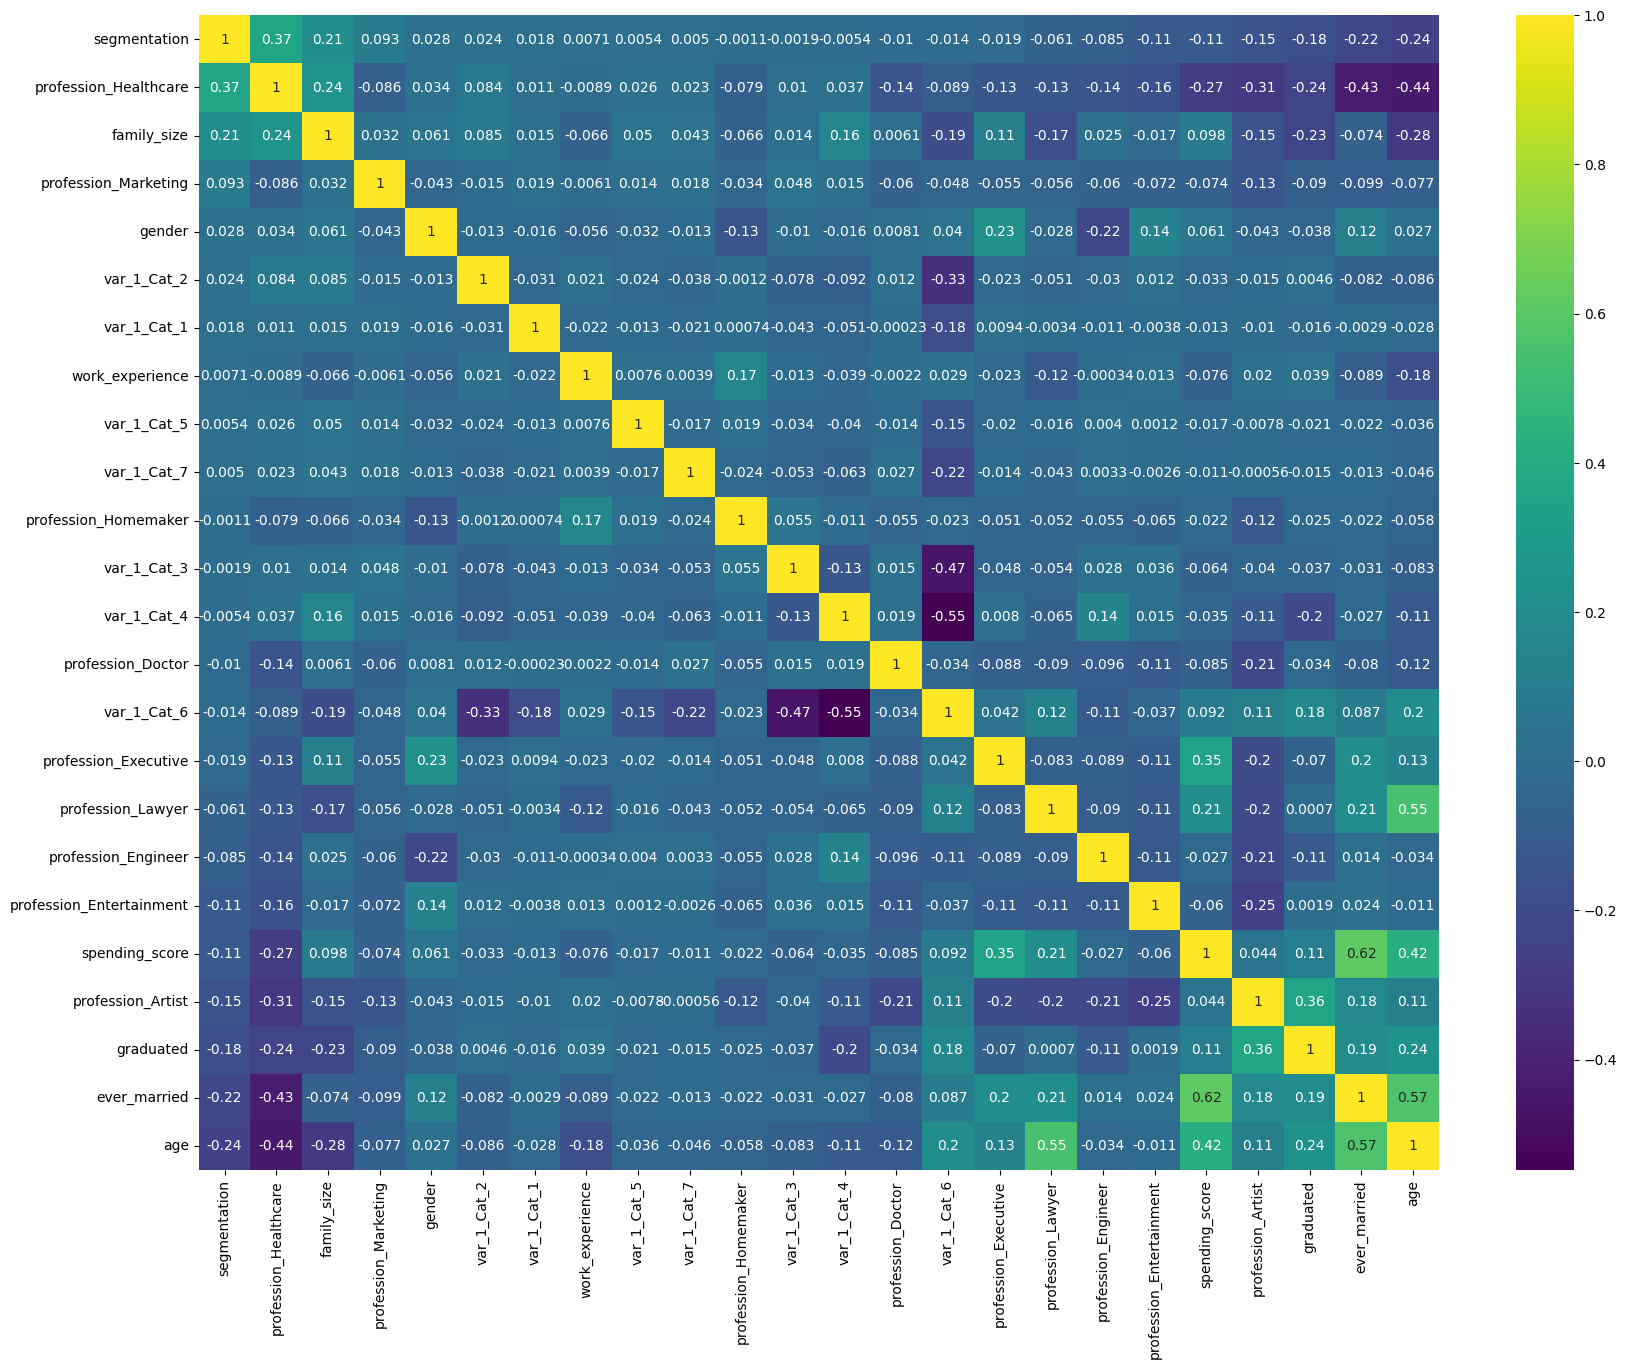

In [59]:
# Correlation Analysis

k = len(df.columns)
cols = df.corr().nlargest(k, 'segmentation')['segmentation'].index
corr_mat = df[cols].corr()

plt.figure(figsize=(20, 15))
sns.heatmap(
    corr_mat,
    cmap='viridis',
    annot=True,
)

In [60]:
df.to_csv("mulclass_preprocessed.csv", index=False)

## 3.6. &nbsp;Data Splitting

In [61]:
# Split it to X and y

X = df.drop(columns="segmentation", axis=1)
y = df["segmentation"]

In [62]:
# Split it to X_train, X_test, y_train, y_test

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    stratify=y,
    random_state=42)

In [63]:
print("y train:", y_train.value_counts(normalize=True))
print("\n")
print("y test:", y_test.value_counts(normalize=True))

y train: segmentation
3    0.277262
2    0.247270
0    0.243521
1    0.231948
Name: proportion, dtype: float64


y test: segmentation
3    0.277705
2    0.247066
0    0.243155
1    0.232073
Name: proportion, dtype: float64


## 3.7. &nbsp;Feature Scaling

In [64]:
# Process scaling using Robust Scaler
like_num = [col for col in X.columns if len(X[col].value_counts()) < 4]

no_scale = ["segmentation"] + like_num

scale = [col for col in X.columns if col not in no_scale]

print("List of columns that need to be scaled:\n", scale)

rs = RobustScaler()

X_train[scale] = rs.fit_transform(X_train[scale])
X_test[scale] = rs.transform(X_test[scale])

print("Feature Scaling, Done!")

List of columns that need to be scaled:
 ['age', 'work_experience', 'family_size']
Feature Scaling, Done!


In [65]:
#Display the top 5 rows of the X_train after scalling
X_train.head()

,gender,ever_married,age,graduated,work_experience,spending_score,family_size,profession_Artist,profession_Doctor,profession_Engineer,profession_Entertainment,profession_Executive,profession_Healthcare,profession_Homemaker,profession_Lawyer,profession_Marketing,var_1_Cat_1,var_1_Cat_2,var_1_Cat_3,var_1_Cat_4,var_1_Cat_5,var_1_Cat_6,var_1_Cat_7
1645,1,1,-0.454545,1,0.00,1,-0.5,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
8003,0,0,-0.500000,0,-0.25,0,0.5,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
439,1,1,0.090909,1,-0.25,0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
6086,1,1,1.409091,1,0.00,2,-0.5,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1300,1,1,0.454545,1,0.00,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [66]:
#Display the top 5 rows of the X_test after scalling
X_test.head()

,gender,ever_married,age,graduated,work_experience,spending_score,family_size,profession_Artist,profession_Doctor,profession_Engineer,profession_Entertainment,profession_Executive,profession_Healthcare,profession_Homemaker,profession_Lawyer,profession_Marketing,var_1_Cat_1,var_1_Cat_2,var_1_Cat_3,var_1_Cat_4,var_1_Cat_5,var_1_Cat_6,var_1_Cat_7
5918,1,0,1.409091,1,0.00,0,-0.5,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
5777,1,1,0.227273,1,0.00,2,0.5,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
5066,1,0,-0.454545,1,1.75,0,-1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2596,1,0,0.090909,1,0.00,0,-1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4166,0,1,0.363636,1,-0.25,1,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


# 4.&nbsp;Modeling

## 4.1.&nbsp;Model Selection

In [67]:
# Candidate models for ML algorithms
models = [
    ("Logistic Regression", LogisticRegression(multi_class= 'ovr')),
    ("Gradient Boosting", GradientBoostingClassifier()),
    ("Random Forest", RandomForestClassifier()),
    ("SVM", SVC())
]

acc_results = []
test_results = []
names = []

col = ["Algorithm", "Accuracy Mean", "Test Accuracy"]

model_results = pd.DataFrame(columns= col)

i = 0

for name, model in models:
  skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
  cv_acc_results = model_selection.cross_val_score(model, X_train, y_train, cv=skf, scoring="accuracy")

  acc_results.append(cv_acc_results)

  model.fit(X_train, y_train)

  y_pred = model.predict(X_test)
  test_accuracy = accuracy_score(y_test, y_pred)
  test_results.append(test_accuracy)

  names.append(name)
  model_results.loc[i] = [name,
                          round(cv_acc_results.mean() * 100, 2),
                          round(test_accuracy * 100, 2)]
  i += 1

model_results.sort_values(by=["Accuracy Mean"], ascending= False)

,Algorithm,Accuracy Mean,Test Accuracy
1,Gradient Boosting,54.21,53.32
3,SVM,53.42,52.67
0,Logistic Regression,50.95,50.33
2,Random Forest,48.83,48.96


## 4.2.&nbsp;Model Tuning

### Gradient Boosting

In [68]:
gb_params = {
    'model': GradientBoostingClassifier(),
    'params': {
        'n_estimators': [50, 100, 200],
        'max_depth': [1, 3, 5],
        'learning_rate': [0.03, 0.07, 0.1],
    }
}

grid_search_gb = GridSearchCV(
    estimator=gb_params['model'],
    param_grid=gb_params['params'],
    cv=skf,
    n_jobs=-1,
    scoring='accuracy'
)

grid_search_gb.fit(X_train, y_train)

best_params_gb = grid_search_gb.best_params_
best_score_gb = grid_search_gb.best_score_

print(f"Best parameters for GradientBoosting: {best_params_gb}")
print(f"Best Accuracy Score for GradientBoosting: {best_score_gb:.4f}\n")

Best parameters for GradientBoosting: {'learning_rate': 0.07, 'max_depth': 3, 'n_estimators': 100}
Best Accuracy Score for GradientBoosting: 0.5438



### Support Vector Machine

In [69]:
svm_params = {
    'model': SVC(),
    'params': {
        'C': [0.1, 0.7, 1],
        'kernel': ['linear', 'rbf', 'poly'],
        'gamma': ['scale', 'auto'],
        'decision_function_shape': ['ovr', 'ovo']
    }
}

grid_search_svm = GridSearchCV(
    estimator=svm_params['model'],
    param_grid=svm_params['params'],
    cv=skf,
    n_jobs=-1,
    scoring='accuracy'
)

grid_search_svm.fit(X_train, y_train)

best_params_svm = grid_search_svm.best_params_
best_score_svm = grid_search_svm.best_score_

print(f"Best parameters for SVM Default: {best_params_svm}")
print(f"Best Accuracy Score for SVM Default: {best_score_svm:.4f}\n")

Best parameters for SVM Default: {'C': 1, 'decision_function_shape': 'ovr', 'gamma': 'scale', 'kernel': 'rbf'}
Best Accuracy Score for SVM Default: 0.5342



### Random Forest

In [70]:
rf_params = {
    'model': RandomForestClassifier(),
    'params': {
        'n_estimators': [50, 75, 100],
        'max_depth': [3, 7, 10],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4]
    }
}

grid_search_rf = GridSearchCV(
    estimator=rf_params['model'],
    param_grid=rf_params['params'],
    cv=skf,
    n_jobs=-1,
    scoring='accuracy'
)

grid_search_rf.fit(X_train, y_train)

best_params_rf = grid_search_rf.best_params_
best_score_rf = grid_search_rf.best_score_

print(f"Best parameters for RandomForest: {best_params_rf}")
print(f"Best Accuracy Score for RandomForest: {best_score_rf:.4f}\n")

Best parameters for RandomForest: {'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 5, 'n_estimators': 50}
Best Accuracy Score for RandomForest: 0.5470



### Result

In [71]:
results = []

# Gradient Boosting results
results.append({
    "Model": "Gradient Boosting",
    "Best Params": best_params_gb,
    "Best Accuracy Score": round(best_score_gb * 100, 2)
})

# SVM results
results.append({
    "Model": "SVM Default",
    "Best Params": best_params_svm,
    "Best Accuracy Score": round(best_score_svm * 100, 2)
})

# Random Forest results
results.append({
    "Model": "Random Forest",
    "Best Params": best_params_rf,
    "Best Accuracy Score": round(best_score_rf * 100, 2)
})

model_results = pd.DataFrame(results)
model_results.sort_values(by=["Best Accuracy Score"], ascending=False, inplace=True)

## 4.3. &nbsp;Model Evaluation

In [77]:
# Model Evaluation
models = [
    ("Gradient Boosting", GradientBoostingClassifier(**best_params_gb)),
    ("Random Forest", RandomForestClassifier(**best_params_rf)),
    ("SVM", SVC(**best_params_svm))
]

acc_results = []
test_results = []
precision_results = []
recall_results = []
f1_results = []
names = []

col = ["Algorithm", "Train Accuracy", "Test Accuracy", "Precision", "Recall", "F1-Score"]
model_results = pd.DataFrame(columns=col)

i = 0

for name, model in models:
    skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
    cv_acc_results = model_selection.cross_val_score(model, X_train, y_train, cv=skf, scoring="accuracy")

    acc_results.append(cv_acc_results)

    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)

    test_accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')

    test_results.append(test_accuracy)
    precision_results.append(precision)
    recall_results.append(recall)
    f1_results.append(f1)
    names.append(name)

    model_results.loc[i] = [
        name,
        round(cv_acc_results.mean() * 100, 2),
        round(test_accuracy * 100, 2),
        round(precision * 100, 2),
        round(recall * 100, 2),
        round(f1 * 100, 2)
    ]

    models[i] = (name, model)

    i += 1

model_results.sort_values(by=["Test Accuracy"], ascending=False)


,Algorithm,Train Accuracy,Test Accuracy,Precision,Recall,F1-Score
0,Gradient Boosting,54.38,53.19,52.30,53.19,52.63
1,Random Forest,54.02,52.87,51.59,52.87,51.74
2,SVM,53.42,52.67,51.75,52.67,51.97


## 4.4. &nbsp;Saving Model

In [78]:
# Create a directory named `modelml`
os.makedirs("modelml", exist_ok=True)

for name, model in models:
    file_path = f"modelml/{name}_model.pkl"

    with open(file_path, 'wb') as file:
        pickle.dump(model, file)

print("Models have been saved successfully.")

Models have been saved successfully.
